In [2]:
import numpy as np
import scipy
import control
import math
import cmath
import matplotlib.pyplot as plt

In [5]:
n=[10, 5]
d=[1, -1.2, 0.2,0]
[r,p,k] = scipy.signal.residue(n,d)
print(r)
print(p)

[ 25.   -43.75  18.75]
[0.  0.2 1. ]


Equação de diferenças original:
$$
y(k+1) - 0.2y(k) = 10u(k) + 5u(k-1)
$$

Aplicando a transforada z:

$$
zY(z) - 0.2Y(z) = \frac{10z}{z-1} + \frac{5}{z-1}
$$

$$
\frac{Y(z)}{z} = \frac{10z+5}{z(z-1)(z-0.2)}= \frac{10z+5}{z^3 - 1.2z^2 + 0.2z}
$$

Expandindo por frações parciais, multiplicando ambos os lados por $z$ e aplicando a transformada inversa, obtem-se:

$$
y(k) = 25*\delta(k) -43.75*0.2^k + 18.75*1^k
$$

In [8]:
kmax=11

# entrada
k = np.linspace(0, kmax-1, kmax);
e = np.zeros(kmax) + 15;
e[0] = 10;   # para k=0
e

array([10., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.])

In [11]:
# solução exata
ye = -43.75*0.2**k + 18.75*1**k
ye[0] = ye[0] + 25

xr = 
 [ 0.         10.         17.         18.4        18.68       18.736
 18.7472     18.74944    18.749888   18.7499776  18.74999552]


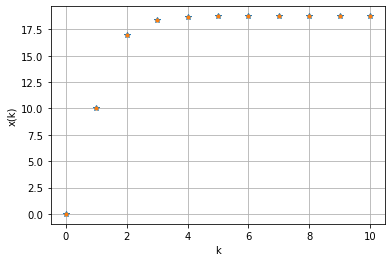

In [12]:
# definição de vetores
y = np.zeros(kmax);

# condições iniciais
y[0] = 0;      # para k=0

for j in range(0,kmax-1):
    y[j+1] = e[j]+0.2*y[j];
    
print("xr = \n",y)

plt.figure()
plt.plot(k,ye,'*',k,y,'.')
plt.xlabel("k")
plt.ylabel("x(k)")
plt.grid(True)
plt.show()
